In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import contractions

In [2]:
data=pd.read_csv('spam_ham_dataset.csv',encoding='latin-1')
data = data[['text', 'label']]
data.head()

,text,label
0,Subject: enron methanol ; meter # : 988291\r\n...,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham
3,"Subject: photoshop , windows , office . cheap ...",spam
4,Subject: re : indian springs\r\nthis deal is t...,ham


(5171, 2)
ham     3672
spam    1499
Name: label, dtype: int64


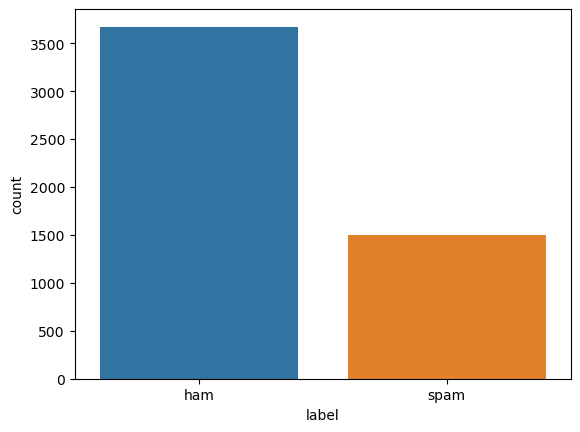

In [3]:
sns.countplot(x=data['label'])
label_count = data['label'].value_counts()
print(data.shape)
print(label_count)

In [4]:
data['length']=data['text'].apply(len)
data.head()

,text,label,length
0,Subject: enron methanol ; meter # : 988291\r\n...,ham,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham,2524
3,"Subject: photoshop , windows , office . cheap ...",spam,414
4,Subject: re : indian springs\r\nthis deal is t...,ham,336


In [5]:
print("Minimum length:", data['length'].min())
print("Maximum length:", data['length'].max())

Minimum length: 11
Maximum length: 32258


In [6]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def preprocess_text(text):
    # Remove newline and carriage return characters
    text = text.replace('\n', ' ').replace('\r', ' ')
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    
    # Convert words to lowercase
    words = [word.lower() for word in words]
    
    # Remove stopwords and stem words
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    # Join words back into a single string
    processed_text = ' '.join(filtered_words)
    
    return processed_text

In [7]:
data['text'] = data['text'].apply(preprocess_text)

In [8]:
X = data['text']

y = data['label']

In [9]:
# Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [11]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(4136, 36392)
(1035, 36392)


In [12]:

model=LogisticRegression(max_iter=1000)

In [13]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# def display_result(df, number=5):
#     for i in range(number):
#         msg = data['text'].iloc[i]
#         label = data["label"].iloc[i]
#         msg_vec = cv.transform([msg])
#         pred_label = model.predict(msg_vec)
#         print(f"**Real: {label}, Predicted: {pred_label[0]}**")
#         print(f"**E-Mail:** {msg}")
#         print("_______________________________________________________________")
    
# data_spam = data[data['label'] == 'spam']
# data_ham = data[data['label'] == 'ham']
# display_result(data_spam)
# display_result(data_ham)

In [15]:


# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9845410628019323


In [16]:
def predict_email(email_text, model, vectorizer):
    processed_text = preprocess_text(email_text)
    text_vector = vectorizer.transform([processed_text])
    prediction = model.predict(text_vector)
    return prediction[0]


In [17]:
input_email = """
Hi Ike,

There’s still time!

The RAG to Riches Developer Quest will teach you how to build an AI chatbot with MongoDB Atlas Vector Search and runs through April 30 — another three weeks of free informative events, coding challenges, and access to expert assistance. It’s a solid foundation in building RAG applications. And it’s free, so get the details and get started.
"""

# Predict label for the input email using the defined function
predicted_label = predict_email(input_email, model, vectorizer)

# Print the predicted label
if predicted_label == 'spam':
    print("The input email is predicted to be spam.")
else:
    print("The input email is predicted to be ham (not spam).")

The input email is predicted to be spam.


In [18]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)